In [23]:
## Run this cell before continuing.
library(tidyverse)
library(repr)
library(readxl)
library(tidymodels)
library(testthat)
library(digest)
library(repr)
library(GGally)
library(ISLR)
options(repr.matrix.max.rows = 6)

New names:
* `` -> ...7
* `` -> ...8



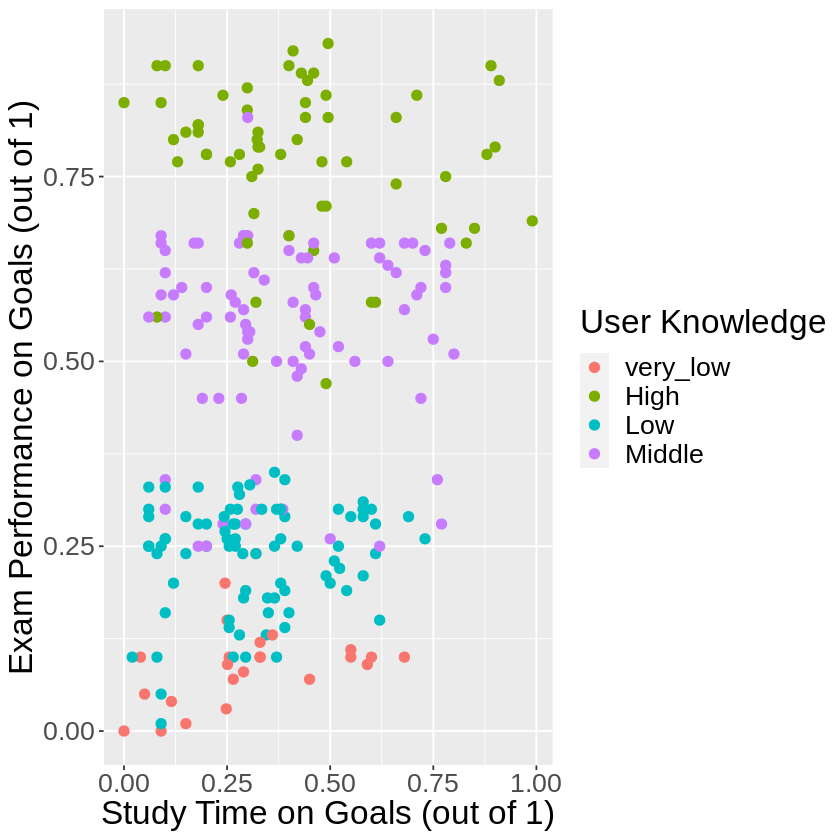

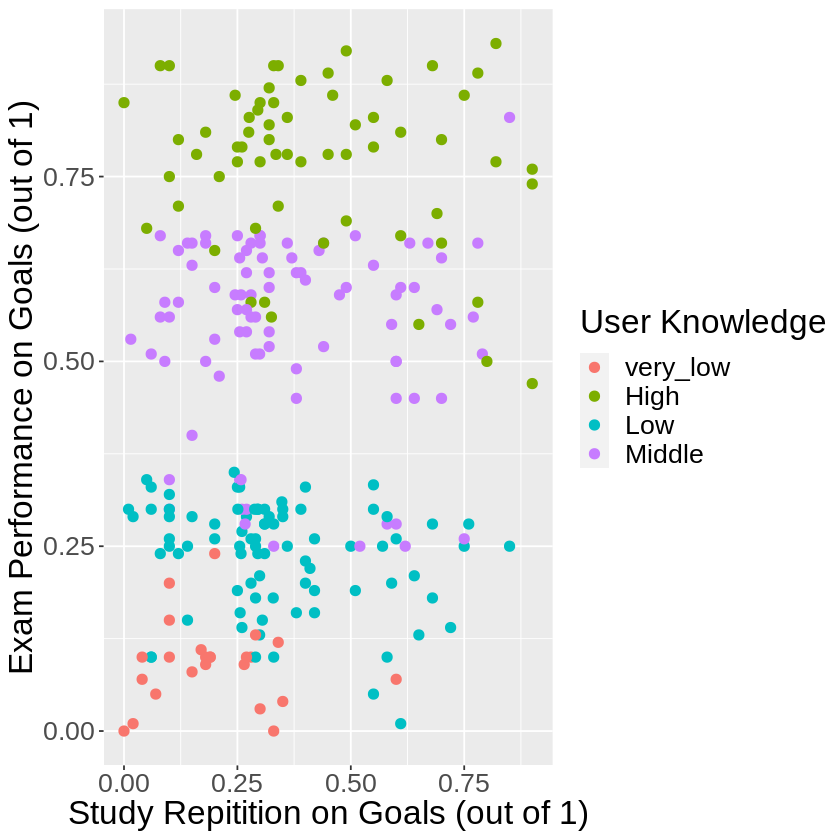

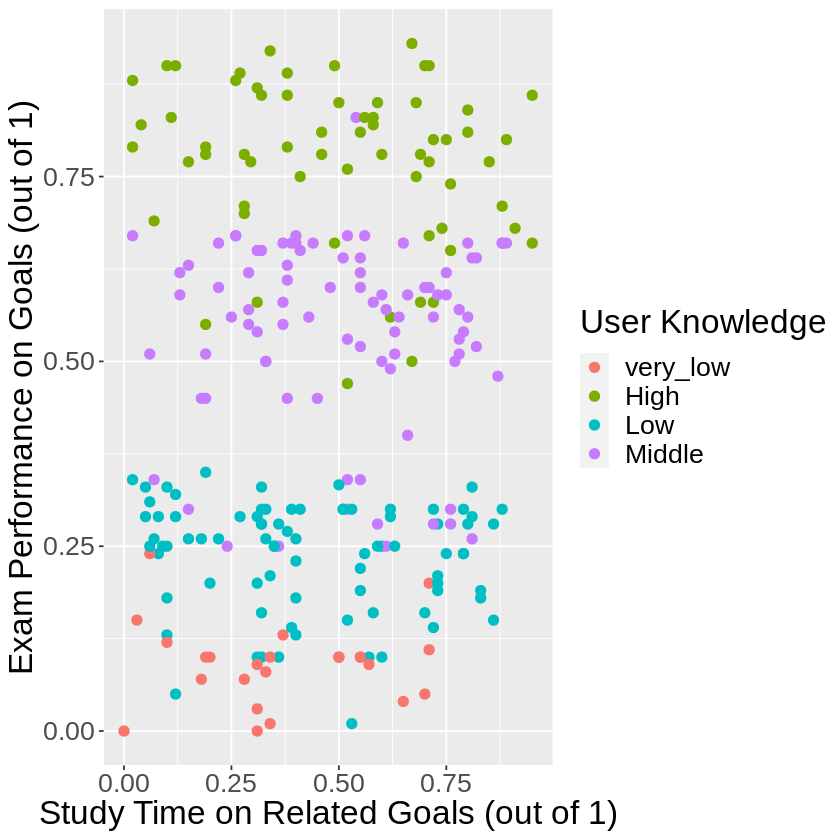

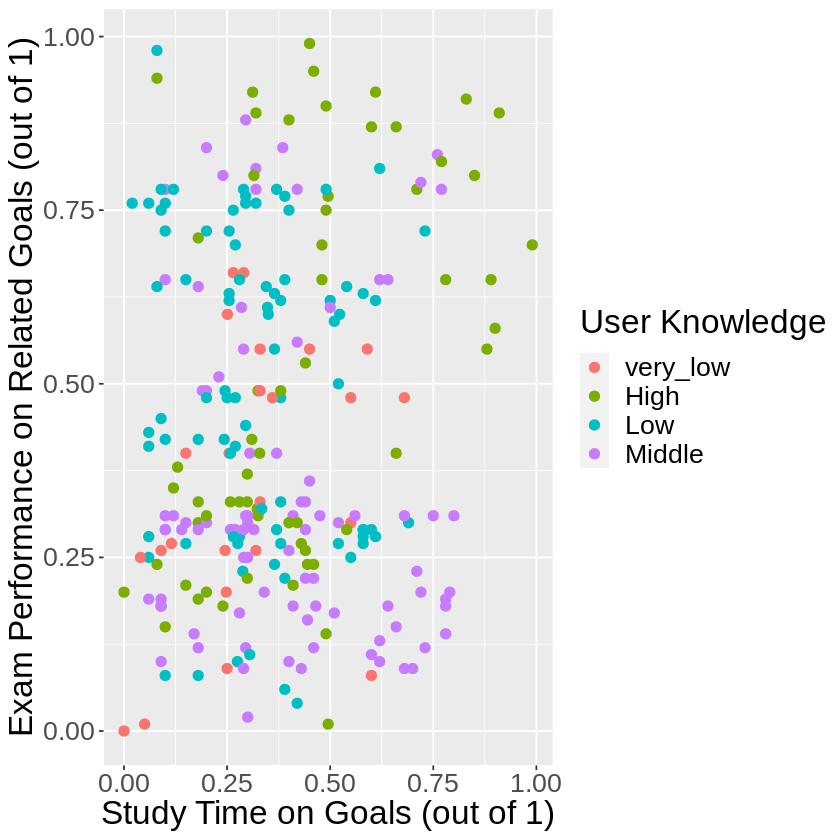

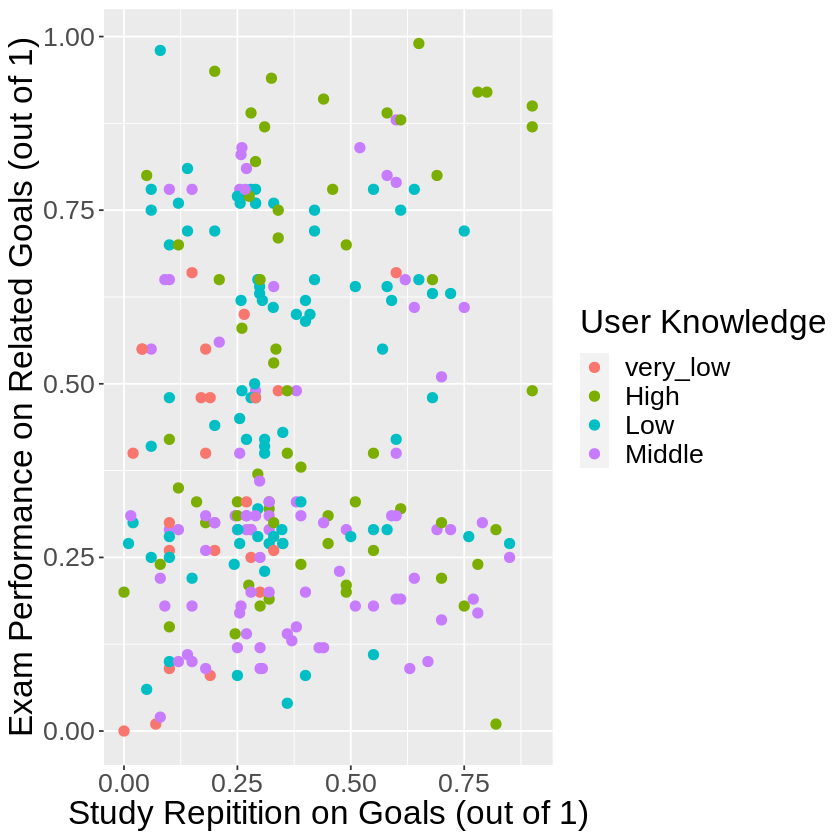

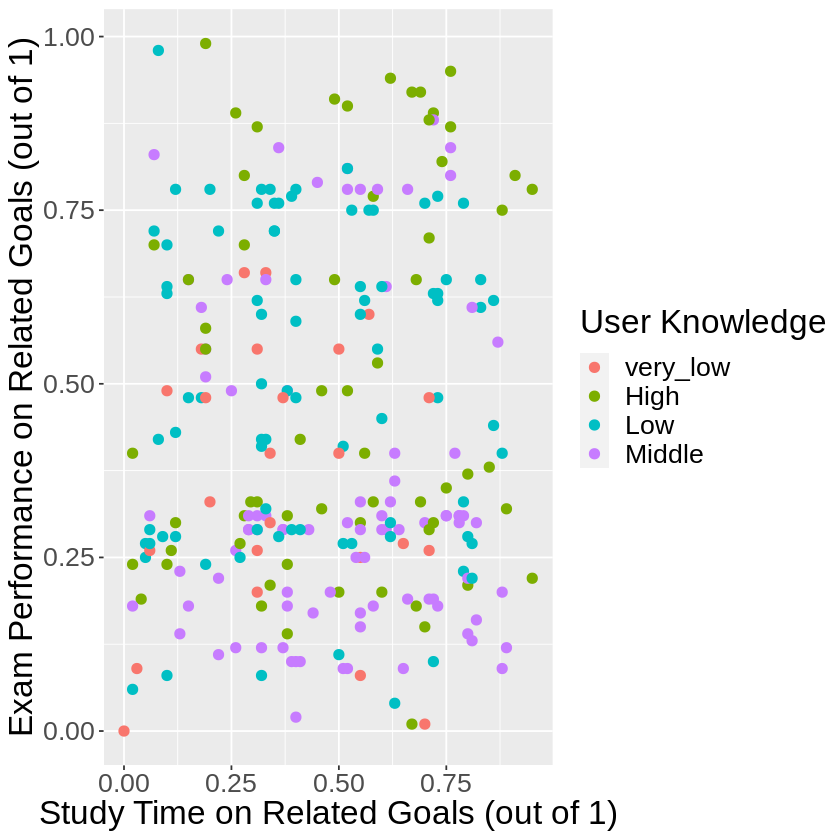

In [24]:
set.seed(1234)
data <- read_xls("data/Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls", sheet = 2) %>%
        select(STG, SCG, STR, LPR, PEG, UNS) %>%
        mutate(UNS = as_factor(UNS))

#Study Time on Goals vs Exam Performance on Goals
plot_STGvsPEG <- data %>%  
    ggplot(aes(x=STG,
               y=PEG,
               colour = UNS)) +
        labs(x = "Study Time on Goals (out of 1)",
             y = "Exam Performance on Goals (out of 1)",
             colour = 'User Knowledge') +
        geom_point(size = 2.5) +
        theme(text = element_text(size = 20))

plot_STGvsPEG

#Study Repitition on Goals vs Exam Performance on Goals
plot_SCGvsPEG <- data %>%  
    ggplot(aes(x=SCG,
               y=PEG,
               colour = UNS)) +
        labs(x = "Study Repitition on Goals (out of 1)",
             y = "Exam Performance on Goals (out of 1)",
             colour = 'User Knowledge') +
        geom_point(size = 2.5) +
        theme(text = element_text(size = 20))

plot_SCGvsPEG

#Study Time on Related Goals vs Exam Performance on Goals
plot_STRvsPEG <- data %>%  
    ggplot(aes(x=STR,
               y=PEG,
               colour = UNS)) +
        labs(x = "Study Time on Related Goals (out of 1)",
             y = "Exam Performance on Goals (out of 1)",
             colour = 'User Knowledge') +
        geom_point(size = 2.5) +
        theme(text = element_text(size = 20))

plot_STRvsPEG

#Study Time on Goals vs Exam Performance on Goals
plot_STGvsLPR <- data %>%  
    ggplot(aes(x=STG,
               y=LPR,
               colour = UNS)) +
        labs(x = "Study Time on Goals (out of 1)",
             y = "Exam Performance on Related Goals (out of 1)",
             colour = 'User Knowledge') +
        geom_point(size = 2.5) +
        theme(text = element_text(size = 20))

plot_STGvsLPR

#Study Repitition on Goals vs Exam Performance on Related Goals
plot_SCGvsLPR <- data %>%  
    ggplot(aes(x=SCG,
               y=LPR,
               colour = UNS)) +
        labs(x = "Study Repitition on Goals (out of 1)",
             y = "Exam Performance on Related Goals (out of 1)",
             colour = 'User Knowledge') +
        geom_point(size = 2.5) +
        theme(text = element_text(size = 20))

plot_SCGvsLPR

#Study Time on Related Goals vs Exam Performance on Related Goals
plot_STRvsLPR <- data %>%  
    ggplot(aes(x=STR,
               y=LPR,
               colour = UNS)) +
        labs(x = "Study Time on Related Goals (out of 1)",
             y = "Exam Performance on Related Goals (out of 1)",
             colour = 'User Knowledge') +
        geom_point(size = 2.5) +
        theme(text = element_text(size = 20))

plot_STRvsLPR


Warning message in warn_if_args_exist(list(...)):
“Extra arguments: 'binwidth' are being ignored.  If these are meant to be aesthetics, submit them using the 'mapping' variable within ggpairs with ggplot2::aes or ggplot2::aes_string.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



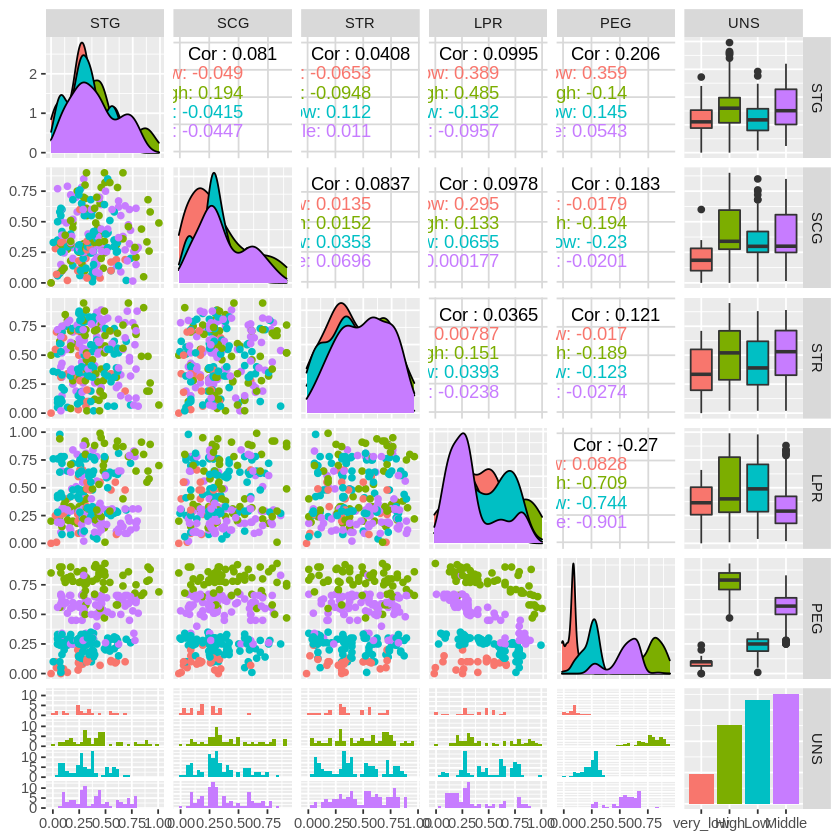

In [25]:

pairs_plot <- ggpairs(data, columns = 1:6, binwidth = 100, mapping=ggplot2::aes(colour = UNS))
pairs_plot

In [26]:
set.seed(2022)
user_split <- initial_split(data, prop = 0.5, strata = UNS)
user_train <- training(user_split)
user_test  <- testing(user_split)

user_split
user_train
user_test

<Analysis/Assess/Total>
<130/128/258>

STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.06,0.06,0.05,0.25,0.33,Low
0.15,0.02,0.34,0.40,0.01,very_low
0.20,0.14,0.35,0.72,0.25,Low
⋮,⋮,⋮,⋮,⋮,⋮
0.61,0.78,0.69,0.92,0.58,High
0.78,0.61,0.71,0.19,0.60,Middle
0.54,0.82,0.71,0.29,0.77,High


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.00,0.00,0.00,0.0,very_low
0.08,0.08,0.10,0.24,0.9,High
0.10,0.10,0.15,0.65,0.3,Middle
⋮,⋮,⋮,⋮,⋮,⋮
0.54,0.51,0.55,0.64,0.19,Low
0.50,0.75,0.81,0.61,0.26,Middle
0.66,0.90,0.76,0.87,0.74,High


Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

! Fold04: internal: No observations were detected in `truth` for level(s): 'very_l...

! Fold07: internal: No observations were detected in `truth` for level(s): 'very_l...

! Fold08: internal: No observations were detected in `truth` for level(s): 'very_l...

! Fold09: internal: No observations were detected in `truth` for level(s): 'very_l...



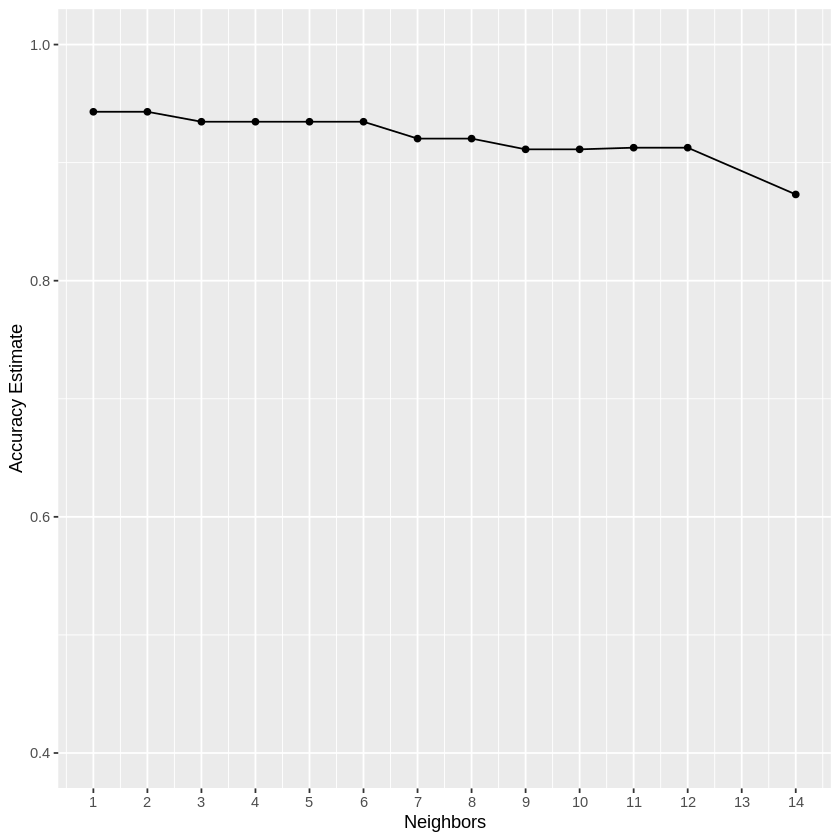

In [27]:
#Creating the recipe to predict UNS with STG and PEG 
#user_recipe <- recipe(UNS ~ STG + PEG, data = user_train)
user_recipe <- recipe(UNS ~ PEG + LPR, data = user_train)
user_recipe

#Doing the vfold for cross_validation to find best K value
user_vfold <- vfold_cv(user_train, v = 10, strata = UNS)

#Getting knn_tune for the workflow
knn_tune <-  nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
       set_engine("kknn") %>%
       set_mode("classification")

#Collecting the results of which is best k value
knn_results <- workflow() %>%
       add_recipe(user_recipe) %>%
       add_model(knn_tune) %>%
       tune_grid(resamples = user_vfold, grid = 20) %>%
       collect_metrics()

#Plotting the K value accuracies
accuracies <- knn_results %>% 
       filter(.metric == "accuracy")

accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       scale_x_continuous(breaks = seq(0, 14, by = 1)) +  # adjusting the x-axis
       scale_y_continuous(limits = c(0.4, 1.0)) # adjusting the y-axis

accuracy_versus_k

In [28]:
#Now that we got the best k value, which is 2, we now use it to predict
user_spec <-  nearest_neighbor(weight_func = "rectangular", neighbors = 5) %>%
       set_engine("kknn") %>%
       set_mode("classification")

user_fit <- workflow() %>%
       add_recipe(user_recipe) %>%
       add_model(user_spec) %>%
       fit(data = user_train)

user_predict <- predict(user_fit, user_test) %>%
                bind_cols(user_test) 
user_predict 

user_metrics <- user_predict %>%
         metrics(truth = UNS, estimate = .pred_class)
user_metrics

user_conf_mat <- user_predict %>% 
       conf_mat(truth = UNS, estimate = .pred_class)
user_conf_mat

.pred_class,STG,SCG,STR,LPR,PEG,UNS
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
very_low,0.00,0.00,0.00,0.00,0.0,very_low
High,0.08,0.08,0.10,0.24,0.9,High
Low,0.10,0.10,0.15,0.65,0.3,Middle
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Low,0.54,0.51,0.55,0.64,0.19,Low
Low,0.50,0.75,0.81,0.61,0.26,Middle
High,0.66,0.90,0.76,0.87,0.74,High


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.8984375
kap,multiclass,0.8561425


          Truth
Prediction very_low High Low Middle
  very_low       10    0   0      0
  High            0   29   0      0
  Low             2    0  43     10
  Middle          0    1   0     33

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          3

! Fold04: internal: No observations were detected in `truth` for level(s): 'very_l...

! Fold07: internal: No observations were detected in `truth` for level(s): 'very_l...

! Fold08: internal: No observations were detected in `truth` for level(s): 'very_l...

! Fold09: internal: No observations were detected in `truth` for level(s): 'very_l...



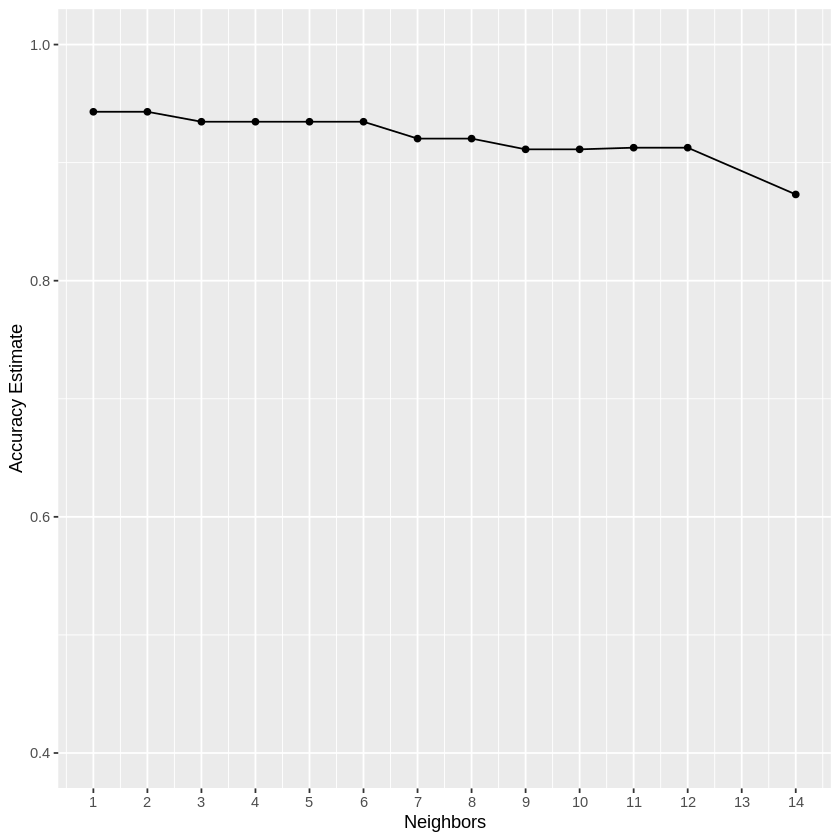

In [29]:
#Creating the recipe to predict UNS with STG and PEG 
user_recipe1 <- recipe(UNS ~ STG + PEG + SCG, data = user_train)

user_recipe1

#Doing the vfold for cross_validation to find best K value
user_vfold1 <- vfold_cv(user_train, v = 10, strata = UNS)

#Getting knn_tune for the workflow
knn_tune1 <-  nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
       set_engine("kknn") %>%
       set_mode("classification")

#Collecting the results of which is best k value
knn_results1 <- workflow() %>%
       add_recipe(user_recipe1) %>%
       add_model(knn_tune1) %>%
       tune_grid(resamples = user_vfold, grid = 20) %>%
       collect_metrics()

#Plotting the K value accuracies
accuracies1 <- knn_results %>% 
       filter(.metric == "accuracy")

accuracy_versus_k1 <- ggplot(accuracies1, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       scale_x_continuous(breaks = seq(0, 14, by = 1)) +  # adjusting the x-axis
       scale_y_continuous(limits = c(0.4, 1.0)) # adjusting the y-axis

accuracy_versus_k1

In [30]:
#Now that we got the best k value, which is 2, we now use it to predict
user_spec1 <-  nearest_neighbor(weight_func = "rectangular", neighbors = 5) %>%
       set_engine("kknn") %>%
       set_mode("classification")

user_fit1 <- workflow() %>%
       add_recipe(user_recipe1) %>%
       add_model(user_spec1) %>%
       fit(data = user_train)

user_predict1 <- predict(user_fit1, user_test) %>%
                bind_cols(user_test) 
user_predict1 

user_metrics1 <- user_predict1 %>%
         metrics(truth = UNS, estimate = .pred_class)
user_metrics1

user_conf_mat1 <- user_predict1 %>% 
       conf_mat(truth = UNS, estimate = .pred_class)
user_conf_mat1

.pred_class,STG,SCG,STR,LPR,PEG,UNS
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
very_low,0.00,0.00,0.00,0.00,0.0,very_low
High,0.08,0.08,0.10,0.24,0.9,High
Low,0.10,0.10,0.15,0.65,0.3,Middle
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Low,0.54,0.51,0.55,0.64,0.19,Low
Low,0.50,0.75,0.81,0.61,0.26,Middle
High,0.66,0.90,0.76,0.87,0.74,High


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.7968750
kap,multiclass,0.7089637


          Truth
Prediction very_low High Low Middle
  very_low        6    0   1      0
  High            0   24   0      2
  Low             6    0  42     11
  Middle          0    6   0     30

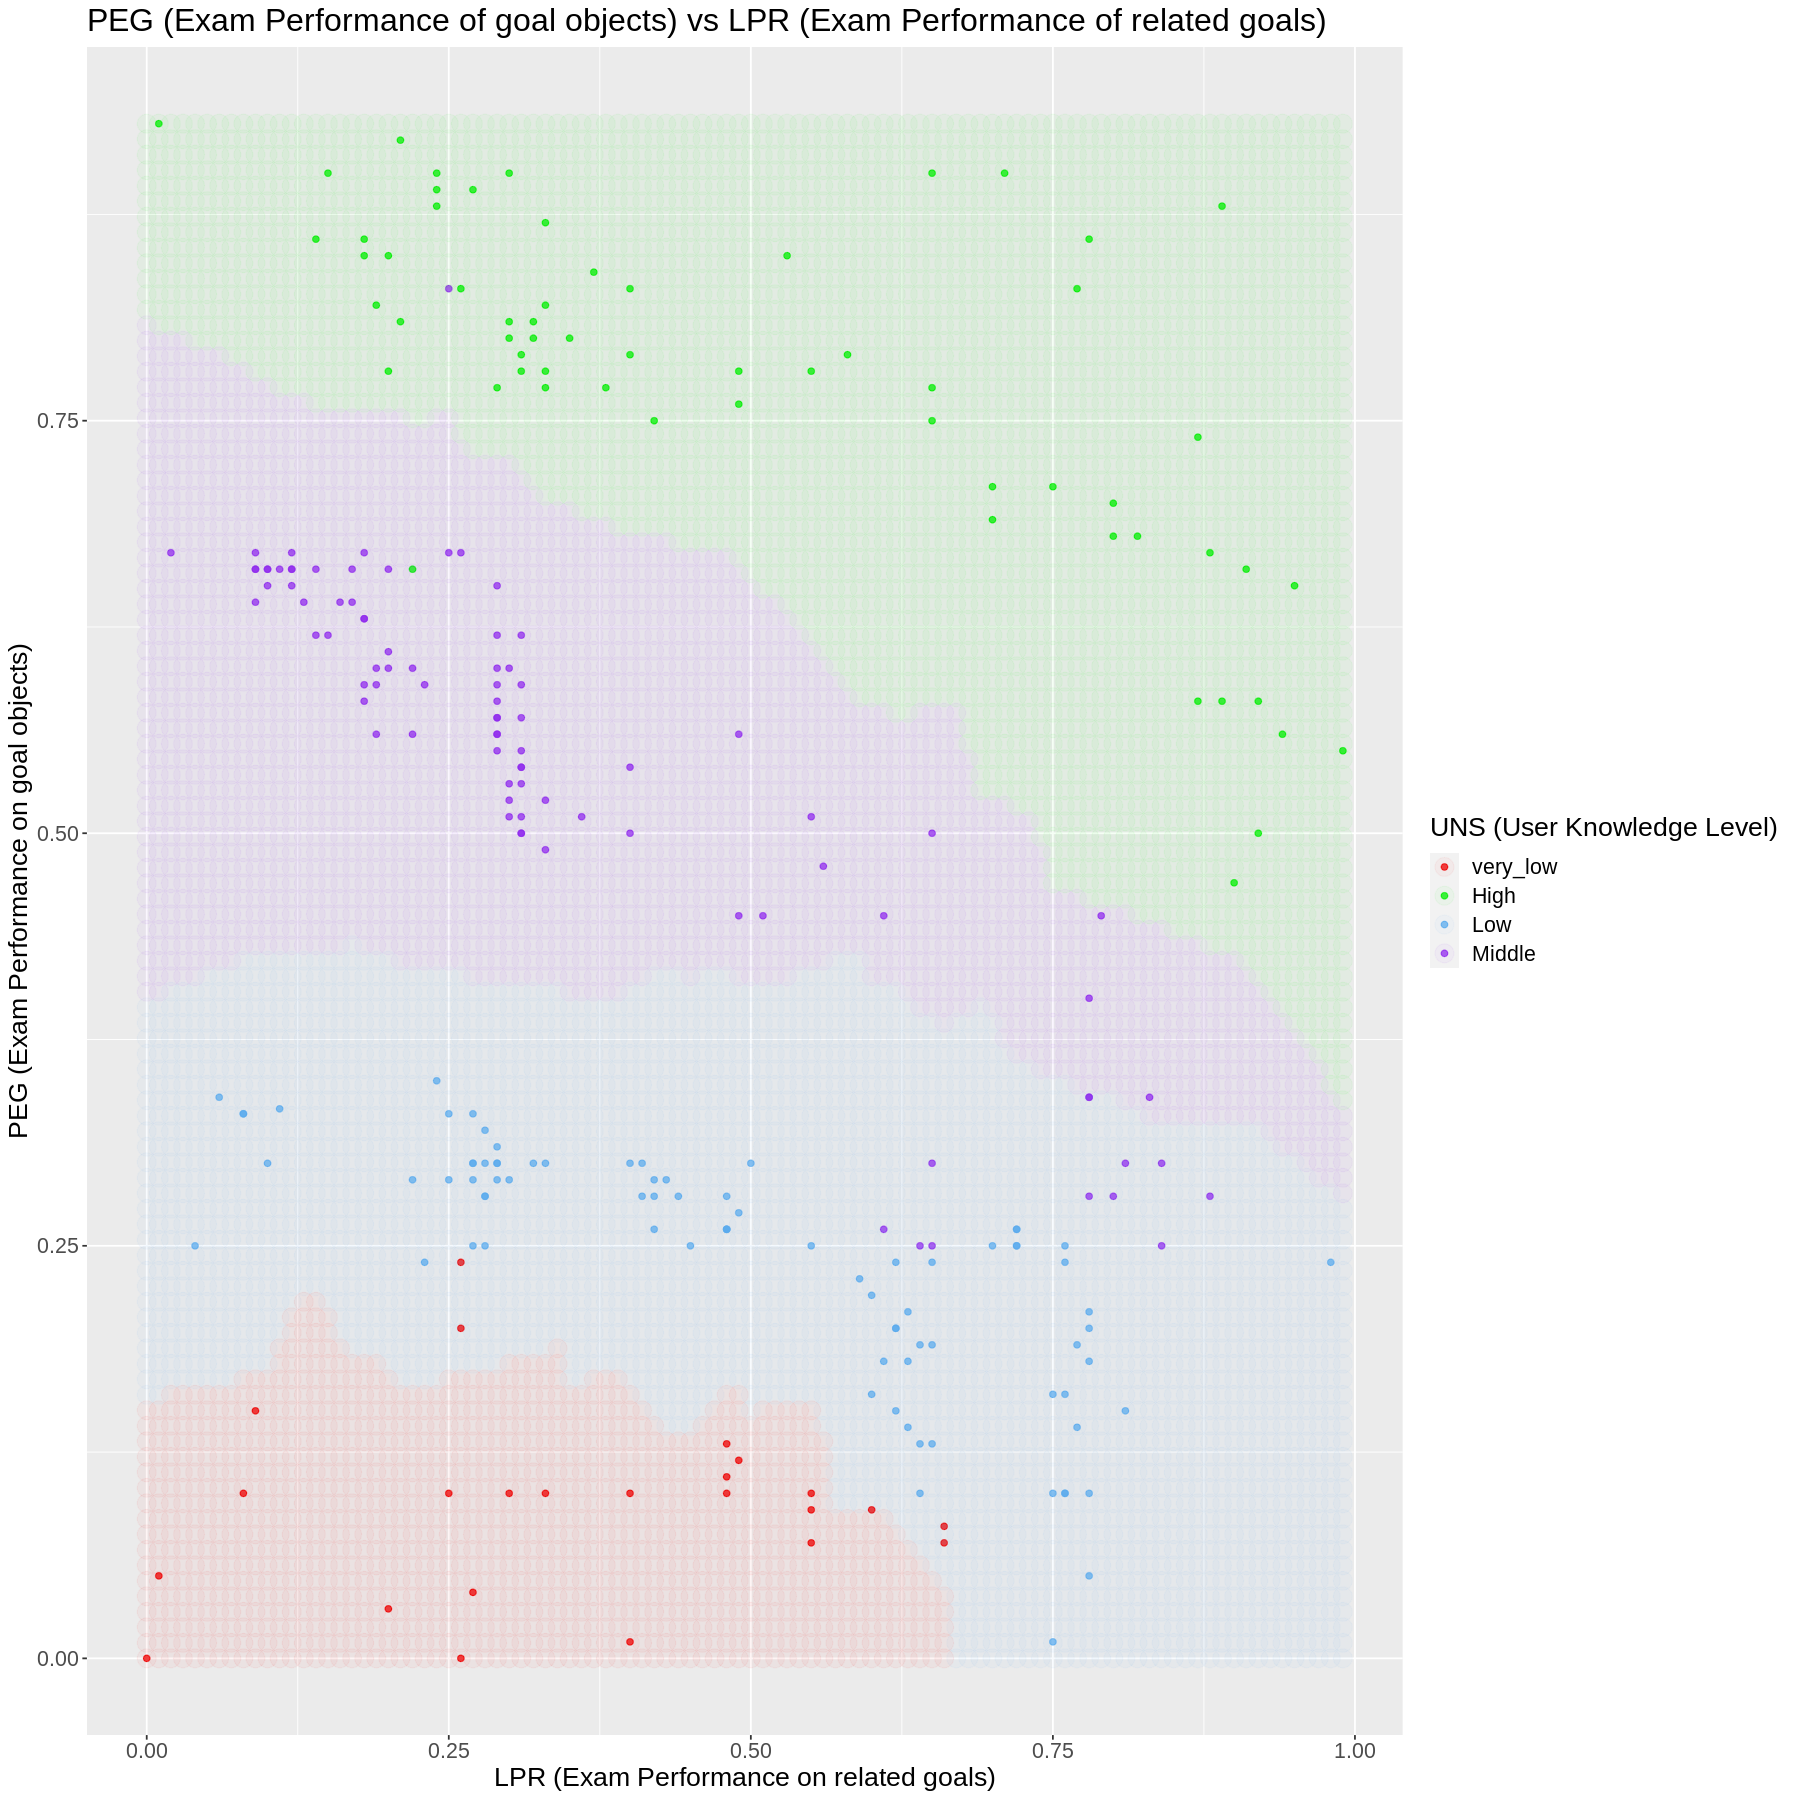

In [32]:
options(repr.plot.width = 15, repr.plot.height = 15)

LPR_grid <- seq(min(data$LPR), 
                max(data$LPR), 
                length.out = 100)

PEG_grid <- seq(min(data$PEG), 
                max(data$PEG), 
                length.out = 100)

asgrid <- as_tibble(expand.grid(LPR = LPR_grid, 
                                PEG = PEG_grid))

user_predict <- predict(user_fit, asgrid)

prediction_table <- bind_cols(user_predict, asgrid) %>% 
  rename(UNS = .pred_class)

user_knowledge_graph_2 <- ggplot() +
    geom_point(data = data, 
               mapping = aes(x = LPR, 
                             y = PEG, 
                             color = UNS), 
               alpha = 0.75) +
    geom_point(data = prediction_table, 
               mapping = aes(x = LPR, 
                             y = PEG, 
                             color = UNS), 
               alpha = 0.04, 
               size = 5) +
    labs(x = "LPR (Exam Performance on related goals)", 
         y = "PEG (Exam Performance on goal objects)", 
         color = "UNS (User Knowledge Level)") +
    ggtitle("PEG (Exam Performance of goal objects) vs LPR (Exam Performance of related goals)") +
    scale_color_manual(values = c("red2", "green2", "steelblue2", "purple2")) +
    theme(text = element_text(size = 16))

user_knowledge_graph_2